In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split

In [2]:
#Read csv data
census = pd.read_csv("Census.csv")
census1 = census.copy()

In [3]:
census1 = census1.set_index(census1['Person ID'])
census1 = census1.drop(columns=['Person ID'])
census1['Region'] = LabelEncoder().fit_transform(census1['Region'])
census1['Residence Type'] = LabelEncoder().fit_transform(census1['Residence Type'])
census1['Family Composition'] = census1['Family Composition'].replace(-9, 0)
census1['Country of Birth'] = census1['Country of Birth'].replace(-9, 0)
census1['Health'] = census1['Health'].replace(-9, 0)
census1['Ethnic Group'] = census1['Ethnic Group'].replace(-9, 0)
census1['Religion'] = census1['Religion'].replace(-9, 0)
census1['Economic Activity'] = census1['Economic Activity'].replace(-9, 0)
census1['Occupation'] = census1['Occupation'].replace(-9, 0)
census1['Industry'] = census1['Industry'].replace(-9, 0)
census1['Hours worked per week'] = census1['Hours worked per week'].replace(-9, 0)
census1['Approximated Social Grade'] = census1['Approximated Social Grade'].replace(-9, 0)
census1['No of hours'] = census1['No of hours'].fillna(0)

In [4]:
census1.head()

,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
Person ID,,,,,,,,,,,,,,,,,,
7394816,0,1,2,1,2,6,2,2,1,2,1,2,5,8,2,0,0.0,4
7394832,0,1,3,1,2,1,1,2,1,2,1,1,0,0,0,0,0.0,0
7394719,0,1,2,1,1,7,2,2,1,1,1,2,5,8,2,0,0.0,2
7394840,0,1,1,1,2,6,4,2,1,3,1,2,5,9,5,0,0.0,4
7394711,0,1,2,1,1,1,1,1,1,1,1,1,0,0,0,0,0.0,0


In [5]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(census1.values)
scaled_features_census = pd.DataFrame(scaled_features, index=census1.index, columns=census1.columns)
scaled_features_census.describe()

,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
count,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05
mean,-8.700014e-17,1.835783e-16,1.903627e-16,6.138898e-16,8.460564e-17,1.301510e-16,-5.492383e-17,1.995416e-16,-1.875691e-16,2.115141e-17,-8.520427e-17,1.596333e-18,-3.671566e-17,5.886478e-17,-1.149360e-16,-5.587165e-16,-5.395605e-16,-3.970878e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.793840e+00,-7.244075e+00,-1.827682e+00,-1.177643e-01,-1.015217e+00,-1.342053e+00,-7.610541e-01,-1.871512e+00,-3.089466e+00,-1.888134e+00,-1.549717e+00,-1.163526e+00,-9.970600e-01,-1.158152e+00,-1.201585e+00,-8.724132e-01,-8.321093e-01,-1.401689e+00
25%,-1.027515e+00,1.380438e-01,-2.450360e-01,-1.177643e-01,-1.015217e+00,-8.914996e-01,-7.610541e-01,5.343274e-01,-3.401406e-01,-8.188565e-01,-3.564589e-01,-7.030639e-01,-5.925055e-01,-1.158152e+00,-1.201585e+00,-8.724132e-01,-8.321093e-01,-6.989253e-01
50%,1.219718e-01,1.380438e-01,-2.450360e-01,-1.177643e-01,9.850107e-01,9.607496e-03,1.278190e-01,5.343274e-01,-3.401406e-01,2.504208e-01,-3.564589e-01,-2.426015e-01,-5.925055e-01,-1.957604e-01,-2.062965e-01,-8.724132e-01,-8.321093e-01,3.838595e-03
75%,8.882965e-01,1.380438e-01,5.462871e-01,-1.177643e-01,9.850107e-01,9.107146e-01,1.278190e-01,5.343274e-01,-3.401406e-01,2.504208e-01,-3.564589e-01,-2.426015e-01,1.025713e+00,7.666311e-01,7.889920e-01,1.158720e+00,9.792127e-01,7.066024e-01
max,1.654621e+00,1.380438e-01,2.920257e+00,1.245627e+01,9.850107e-01,1.811822e+00,2.794438e+00,5.343274e-01,2.409185e+00,3.458252e+00,4.416572e+00,2.980635e+00,2.643931e+00,1.729023e+00,1.784281e+00,1.835764e+00,2.186761e+00,1.409366e+00


In [6]:
#%pip install yellowbrick

C:\Users\nadon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nadon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nadon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

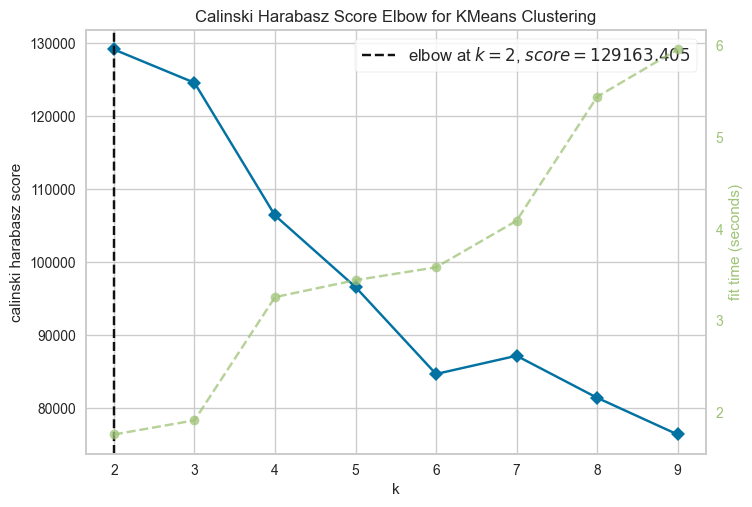

<AxesSubplot: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [7]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), metric='calinski_harabasz')

visualizer.fit(scaled_features_census)        
visualizer.show()

In [8]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=12)
census1['Cluster'] = kmeans.fit_predict(scaled_features_census)

C:\Users\nadon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:
census1.head()

,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade,Cluster
Person ID,,,,,,,,,,,,,,,,,,,
7394816,0,1,2,1,2,6,2,2,1,2,1,2,5,8,2,0,0.0,4,2
7394832,0,1,3,1,2,1,1,2,1,2,1,1,0,0,0,0,0.0,0,1
7394719,0,1,2,1,1,7,2,2,1,1,1,2,5,8,2,0,0.0,2,2
7394840,0,1,1,1,2,6,4,2,1,3,1,2,5,9,5,0,0.0,4,2
7394711,0,1,2,1,1,1,1,1,1,1,1,1,0,0,0,0,0.0,0,1


In [10]:
cluster_stats = census1.groupby('Cluster').agg(['mean']).T

In [11]:
cluster_stats

,Cluster,0,1,2
Region,mean,4.734121,4.684258,4.602487
Residence Type,mean,0.995668,0.968591,0.970973
Family Composition,mean,2.306644,2.631567,2.041437
Population Base,mean,1.003393,1.065263,1.001839
Sex,mean,1.457727,1.482602,1.601818
Age,mean,4.150294,1.294219,6.000273
Marital Status,mean,1.875275,1.007488,2.546993
Student,mean,1.982386,1.187339,1.977903
Country of Birth,mean,1.158851,1.046213,1.137785
Health,mean,1.602650,1.206045,2.479369


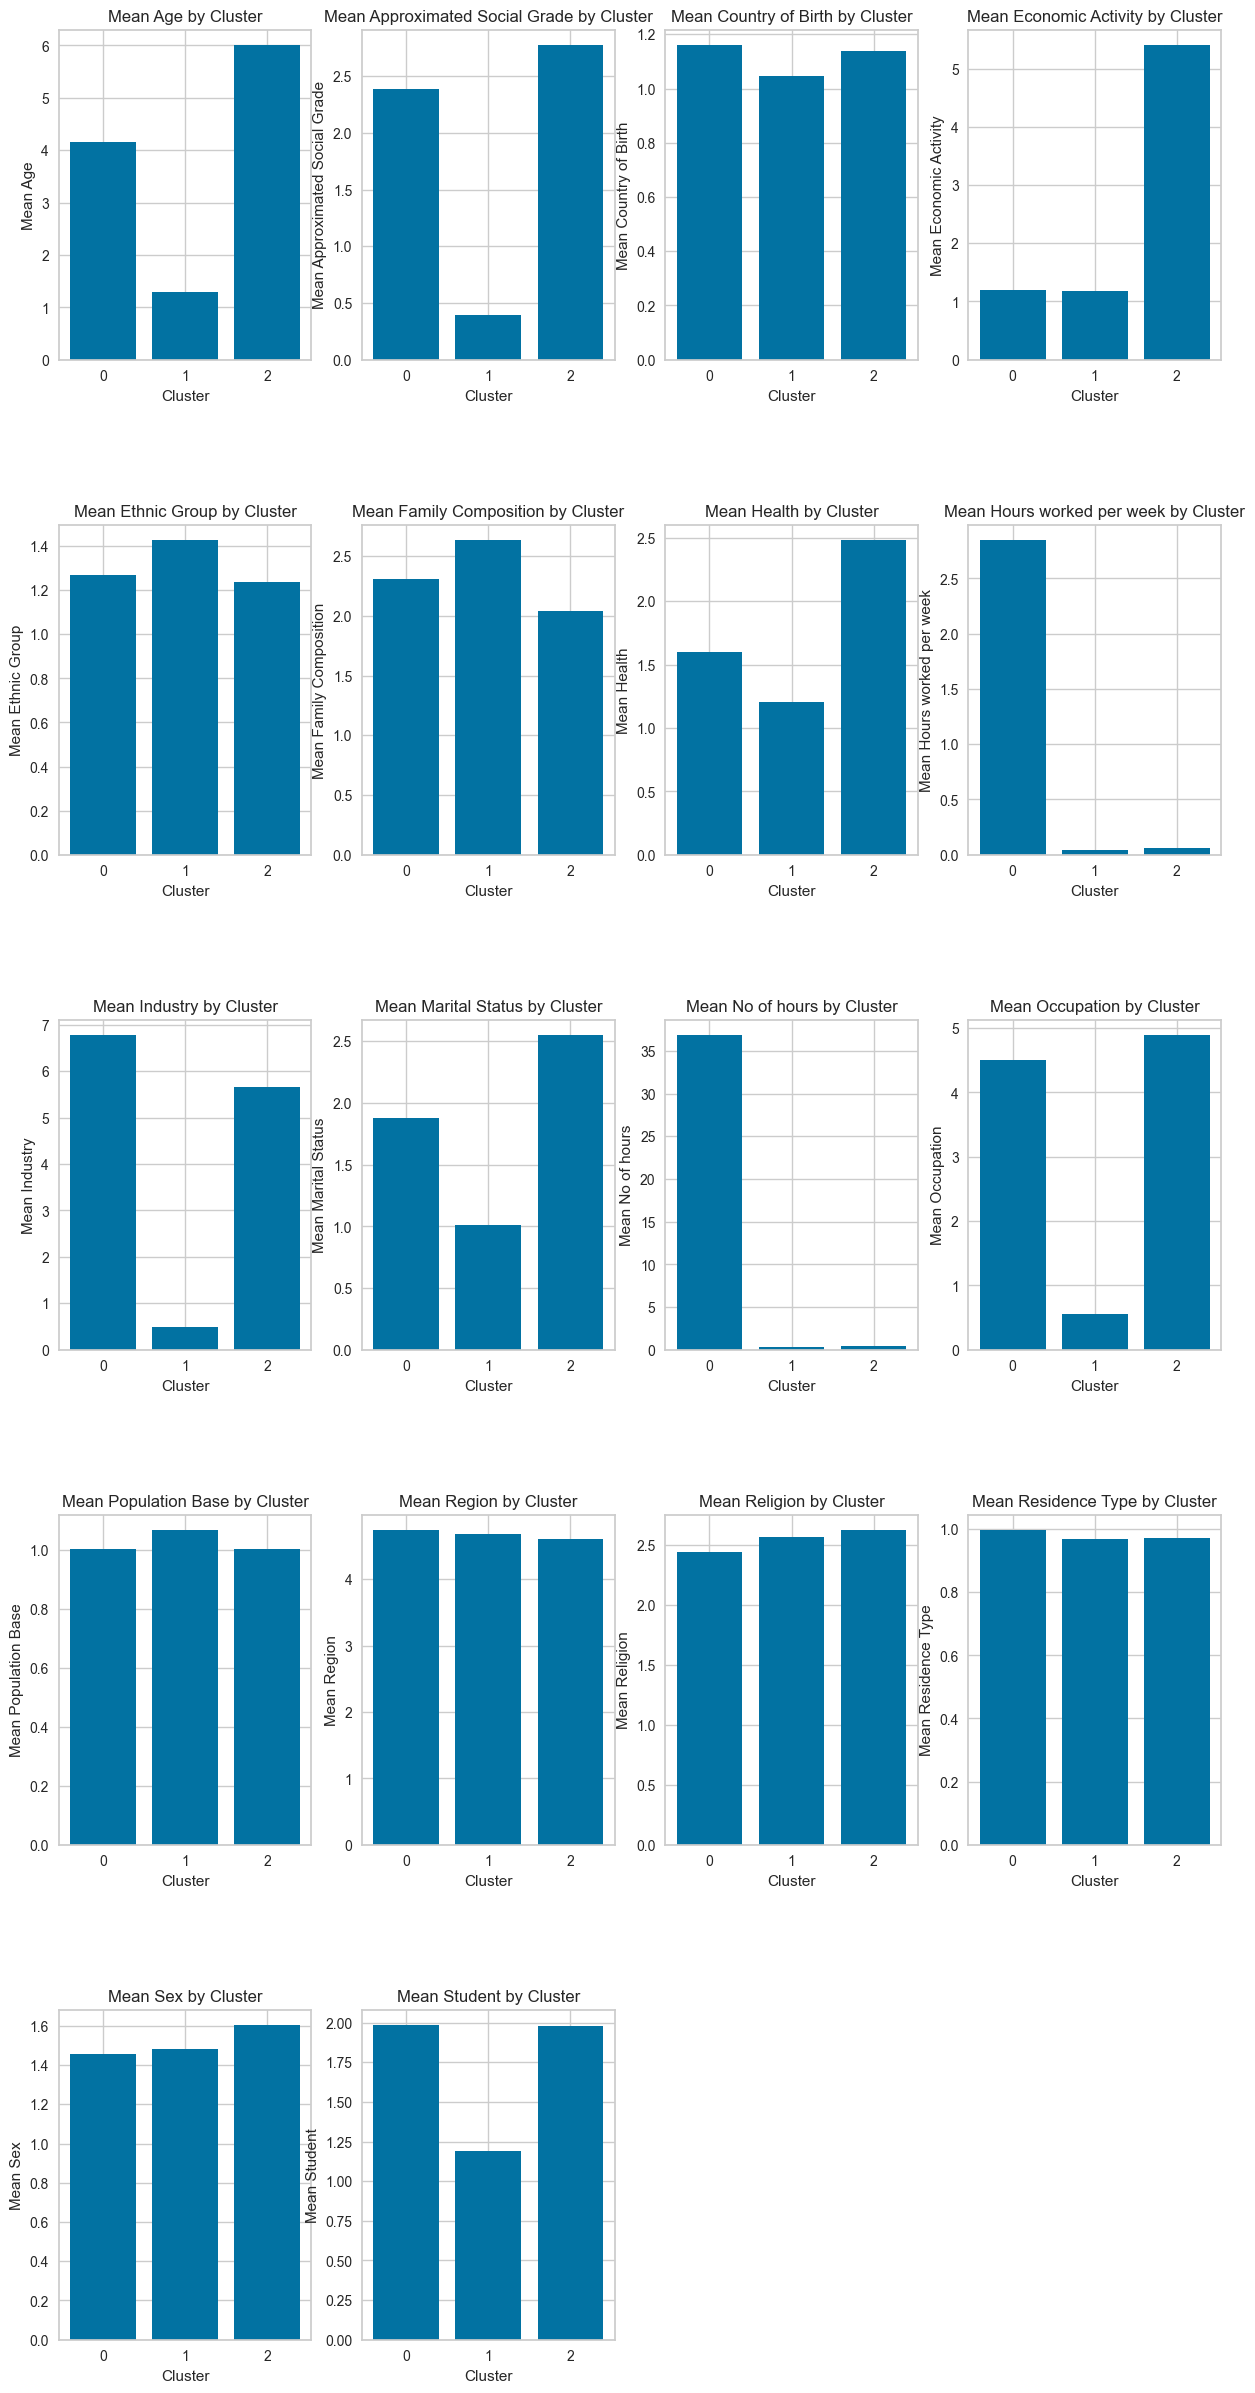

In [12]:
cluster_means = census1.groupby('Cluster').mean()

cluster_labels = cluster_means.index


columns_to_plot = census1.columns.difference(['Cluster'])


num_columns = len(columns_to_plot)
rows = (num_columns + 3) // 4 

fig, axes = plt.subplots(rows, 4, figsize=(15, 6 * rows))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(columns_to_plot):
    row = i // 4
    col = i % 4
    axes[row, col].bar(cluster_labels, cluster_means[column])
    axes[row, col].set_xlabel('Cluster')
    axes[row, col].set_ylabel('Mean ' + column)
    axes[row, col].set_title('Mean ' + column + ' by Cluster')


for i in range(num_columns, rows * 4):
    fig.delaxes(axes.flatten()[i])

plt.show()

In [13]:
census1_sample, _ = train_test_split(census1, test_size=1 - 0.01, random_state=12)

In [14]:
scaled_data = scaler.fit_transform(census1_sample)


linkage_matrix = linkage(scaled_data, method='ward')


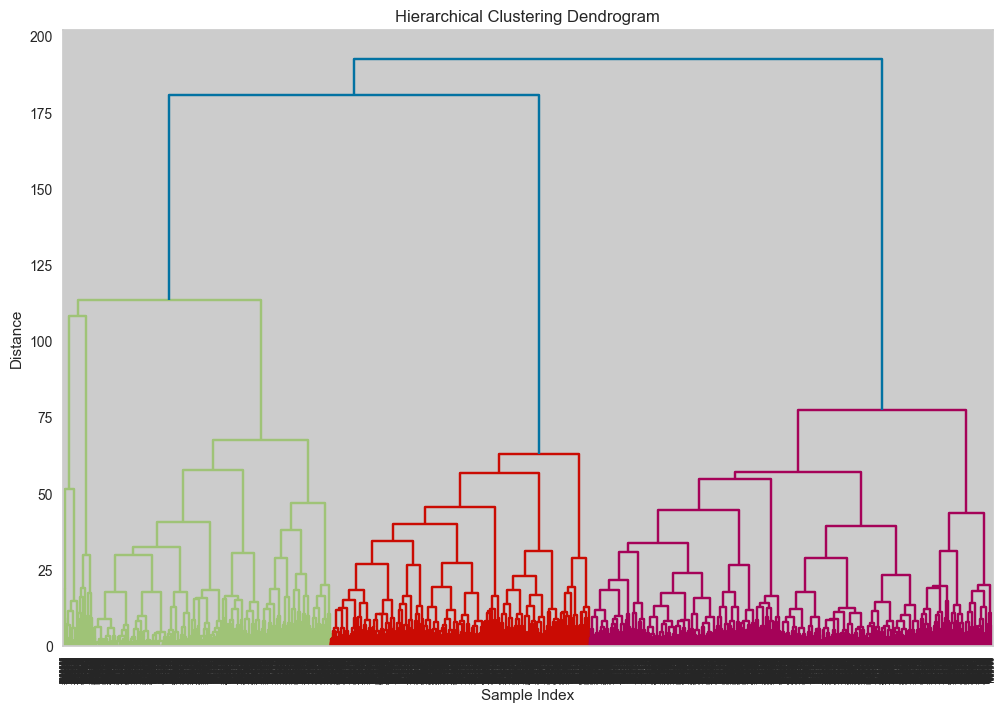

In [15]:
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, orientation='top', labels=census1_sample.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [16]:
hcluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
census1_sample['Cluster'] = hcluster.fit_predict(census1_sample)

In [17]:
census1_sample.head()

,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade,Cluster
Person ID,,,,,,,,,,,,,,,,,,,
7413470,2,1,2,1,1,8,2,2,1,2,1,2,2,5,2,2,28.0,3,1
7910724,6,1,2,1,2,6,2,2,2,5,3,4,8,0,0,0,0.0,4,0
7404191,1,1,2,1,1,5,2,2,1,1,1,2,1,3,2,3,31.0,2,1
7671205,3,1,5,1,2,2,1,2,1,1,1,9,1,4,10,2,19.0,2,2
7415871,2,1,5,1,1,1,1,1,1,1,1,2,0,0,0,0,0.0,0,0


In [18]:
census1_sample['Cluster'].value_counts()

0    3246
1    1916
2     535
Name: Cluster, dtype: int64

In [19]:
cluster_stats1 = census1_sample.groupby('Cluster').agg(['mean']).T
cluster_stats1

,Cluster,0,1,2
Region,mean,4.677141,4.729123,4.885981
Residence Type,mean,0.971041,0.994781,0.996262
Family Composition,mean,2.358903,2.274530,2.403738
Population Base,mean,1.030191,1.004175,1.000000
Sex,mean,1.532039,1.367432,1.727103
Age,mean,3.770487,4.180063,4.261682
Marital Status,mean,1.785274,1.877871,1.955140
Student,mean,1.612446,1.991649,1.953271
Country of Birth,mean,1.097351,1.141962,1.157009
Health,mean,1.885705,1.601775,1.728972


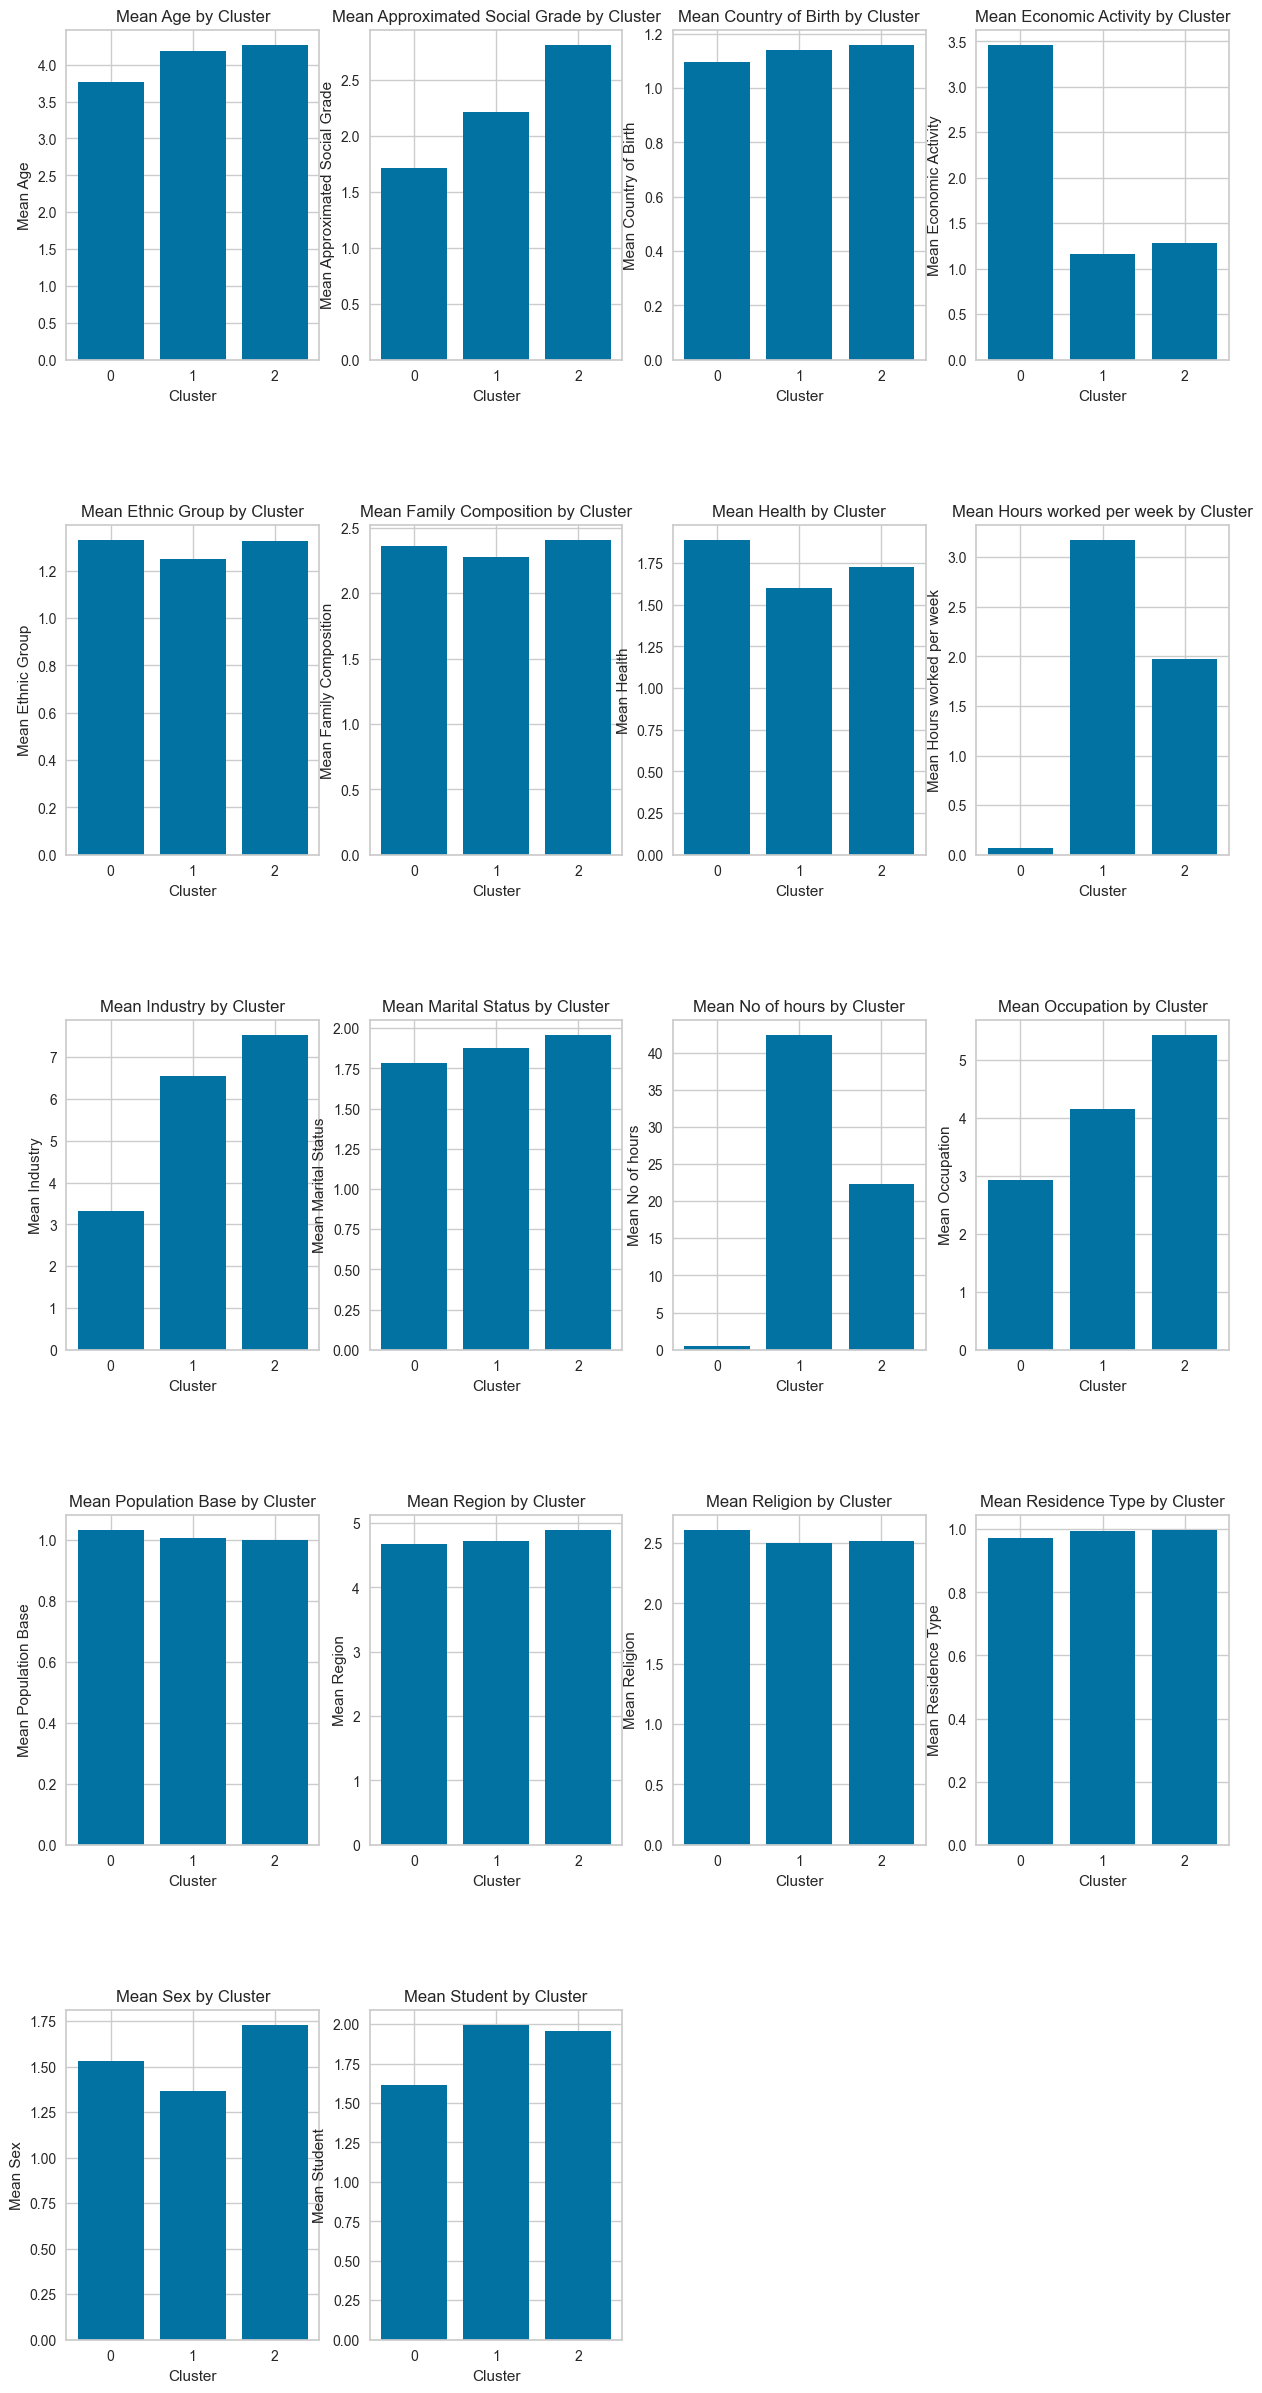

In [20]:
cluster_means = census1_sample.groupby('Cluster').mean()


cluster_labels = cluster_means.index


columns_to_plot = census1_sample.columns.difference(['Cluster'])


num_columns = len(columns_to_plot)
rows = (num_columns + 3) // 4  

fig, axes = plt.subplots(rows, 4, figsize=(15, 6 * rows))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(columns_to_plot):
    row = i // 4
    col = i % 4
    axes[row, col].bar(cluster_labels, cluster_means[column])
    axes[row, col].set_xlabel('Cluster')
    axes[row, col].set_ylabel('Mean ' + column)
    axes[row, col].set_title('Mean ' + column + ' by Cluster')


for i in range(num_columns, rows * 4):
    fig.delaxes(axes.flatten()[i])

plt.show()


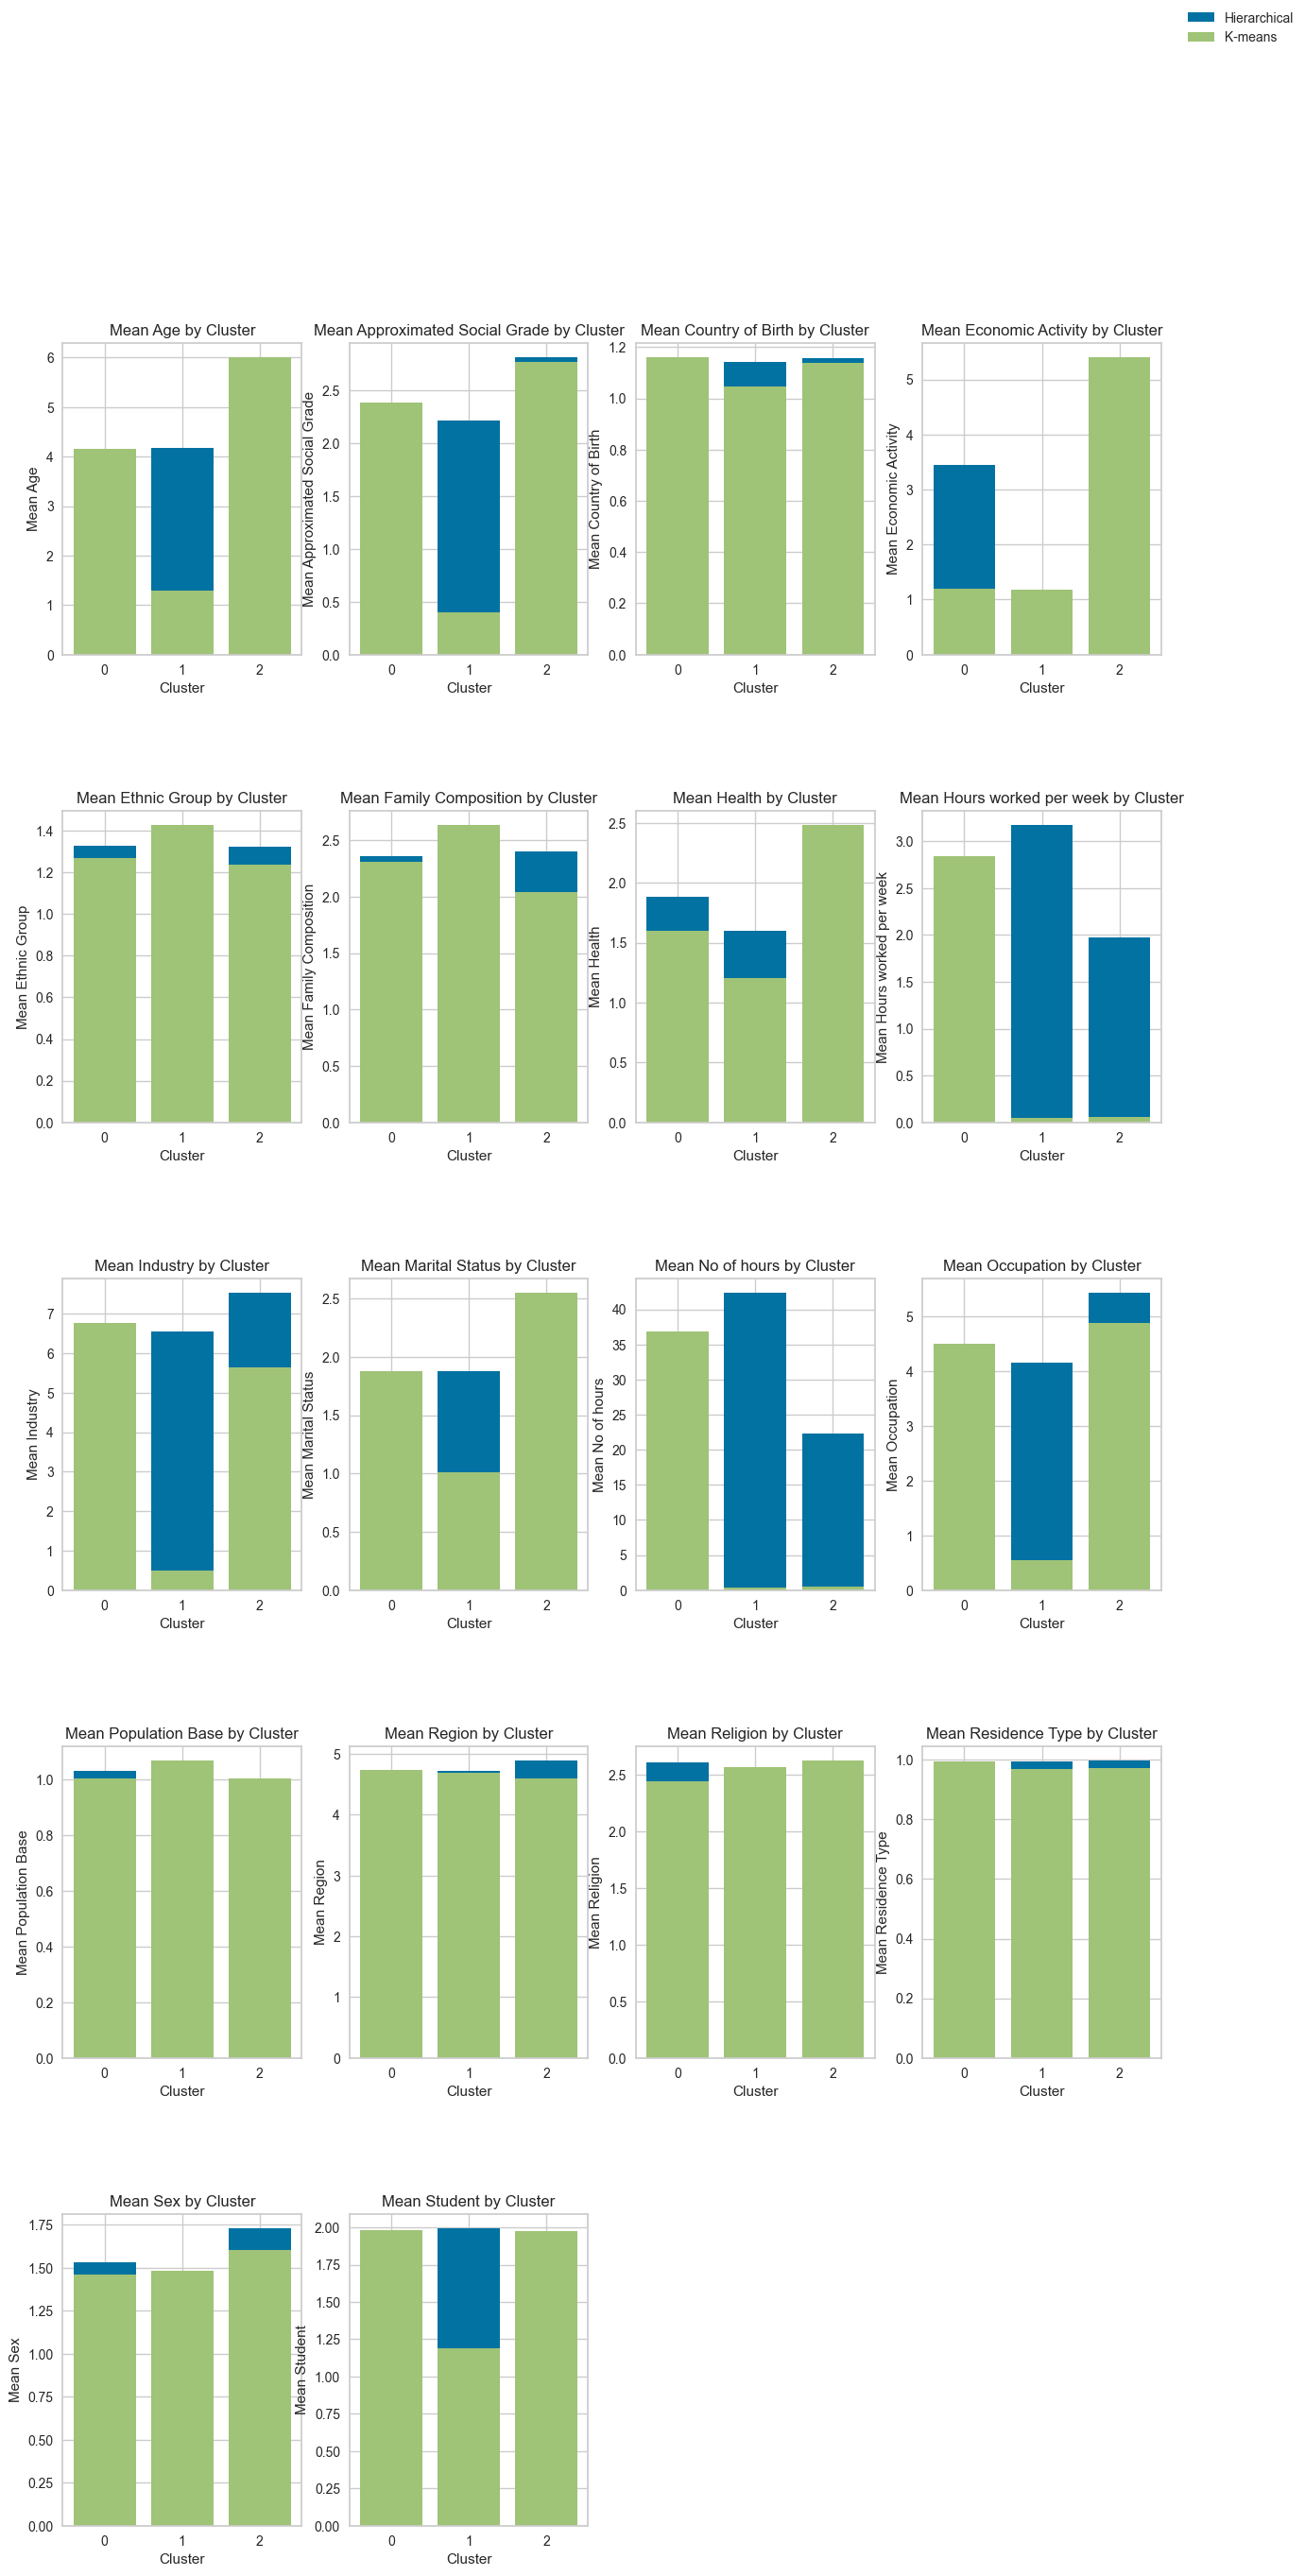

In [21]:

cluster_means_sample = census1_sample.groupby('Cluster').mean()
cluster_means_census1 = census1.groupby('Cluster').mean()


cluster_labels_sample = cluster_means_sample.index
cluster_labels_census1 = cluster_means_census1.index


columns_to_plot_sample = census1_sample.columns.difference(['Cluster'])
columns_to_plot_census1 = census1.columns.difference(['Cluster'])

num_columns_sample = len(columns_to_plot_sample)
num_columns_census1 = len(columns_to_plot_census1)
rows_sample = (num_columns_sample + 3) // 4  
rows_census1 = (num_columns_census1 + 3) // 4  

fig, axes = plt.subplots(max(rows_sample, rows_census1), 4, figsize=(15, 6 * max(rows_sample, rows_census1)))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(columns_to_plot_sample):
    row = i // 4
    col = i % 4
    axes[row, col].bar(cluster_labels_sample, cluster_means_sample[column], label='census1_sample')
    axes[row, col].set_xlabel('Cluster')
    axes[row, col].set_ylabel('Mean ' + column)
    axes[row, col].set_title('Mean ' + column + ' by Cluster')

for i, column in enumerate(columns_to_plot_census1):
    row = i // 4
    col = i % 4
    axes[row, col].bar(cluster_labels_census1, cluster_means_census1[column], label='census1')
    axes[row, col].set_xlabel('Cluster')
    axes[row, col].set_ylabel('Mean ' + column)
    axes[row, col].set_title('Mean ' + column + ' by Cluster')


for i in range(max(num_columns_sample, num_columns_census1), max(rows_sample, rows_census1) * 4):
    fig.delaxes(axes.flatten()[i])


fig.legend(['Hierarchical', 'K-means'])
plt.show()
